In [1]:
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.layers import xavier_initializer
import tensorflow as tf

tf.set_random_seed(66666)

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

xs = tf.placeholder(tf.float32, [None, 784])
ys = tf.placeholder(tf.float32, [None, 10])

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


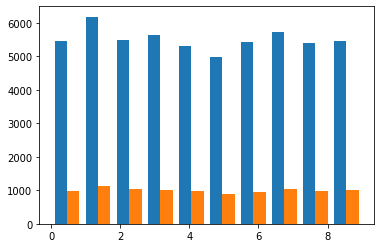

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist((np.argmax(mnist.train.labels,axis = 1),np.argmax(mnist.test.labels,axis = 1)))
plt.show()

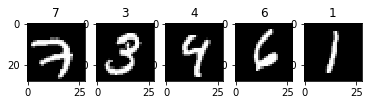

In [3]:
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(np.squeeze(np.reshape(mnist.train.images[i], newshape=[28,28])), cmap='gray')
  plt.title(np.argmax(mnist.train.labels[i],axis = 0))
plt.show()

In [0]:
def conv_net(data):
  input = tf.reshape(data, [-1, 28, 28, 1])

  # Convolutional Layer #1
  conv1 = tf.layers.conv2d(
      inputs=input,
      filters=32,
      kernel_size=[3, 3],
      padding="valid",
      activation=tf.nn.relu)

  # Convolutional Layer #2
  conv2 = tf.layers.conv2d(
      inputs=conv1,
      filters=32,
      kernel_size=[3, 3],
      padding="valid",
      activation=tf.nn.relu)

  pool1 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Convolutional Layer #3
  conv3 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[3, 3],
      padding="valid",
      activation=tf.nn.relu)

  # Convolutional Layer #4
  conv4 = tf.layers.conv2d(
      inputs=conv3,
      filters=64,
      kernel_size=[3, 3],
      padding="valid",
      activation=tf.nn.relu)

  # Convolutional Layer #5
  conv5 = tf.layers.conv2d(
      inputs=conv4,
      filters=128,
      kernel_size=[3, 3],
      padding="valid",
      activation=tf.nn.relu)

  # Convolutional Layer #6
  conv6 = tf.layers.conv2d(
      inputs=conv5,
      filters=10,
      kernel_size=[3, 3],
      padding="valid",
      activation=tf.nn.relu)

  # pool2 = tf.layers.max_pooling2d(inputs=conv6, pool_size=[4, 4], strides=4)
  pool2 = tf.reduce_max(input_tensor = conv6, axis = [1,2])

  flat = tf.reshape(pool2, [-1, 10])

  # prediction
  predictions = tf.nn.softmax(flat)
  return predictions

In [5]:
predictions = conv_net(xs)

# cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(predictions), reduction_indices=[1]))
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=predictions, labels=ys)

train_step = tf.train.AdamOptimizer(0.001).minimize(cross_entropy)

# compute the accuracy
correct_predictions = tf.equal(tf.argmax(predictions, 1), tf.argmax(ys, 1))

accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

tmp = 0
loss_log = []

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.


In [6]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    for i in range(5000):
        batch_xs, batch_ys = mnist.train.next_batch(256)

        los = sess.run(cross_entropy, feed_dict={xs: batch_xs, ys: batch_ys})
        loss_log.append(los)

        sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys})

        if (i + 1) % 100 == 0:
            acc = sess.run(accuracy, feed_dict={
                xs: mnist.test.images,
                ys: mnist.test.labels
            })
            print("steps : %d " % (i + 1), "accuracy: ", acc)

steps : 100  accuracy:  0.6606
steps : 200  accuracy:  0.6677
steps : 300  accuracy:  0.7613
steps : 400  accuracy:  0.7772
steps : 500  accuracy:  0.7716
steps : 600  accuracy:  0.7855
steps : 700  accuracy:  0.7873
steps : 800  accuracy:  0.7891
steps : 900  accuracy:  0.7833
steps : 1000  accuracy:  0.79
steps : 1100  accuracy:  0.7914
steps : 1200  accuracy:  0.7909
steps : 1300  accuracy:  0.7922
steps : 1400  accuracy:  0.7911
steps : 1500  accuracy:  0.7923
steps : 1600  accuracy:  0.7934
steps : 1700  accuracy:  0.7927
steps : 1800  accuracy:  0.7943
steps : 1900  accuracy:  0.7944
steps : 2000  accuracy:  0.7927
steps : 2100  accuracy:  0.7947
steps : 2200  accuracy:  0.8875
steps : 2300  accuracy:  0.8941
steps : 2400  accuracy:  0.8921
steps : 2500  accuracy:  0.8934
steps : 2600  accuracy:  0.895
steps : 2700  accuracy:  0.8944
steps : 2800  accuracy:  0.8945
steps : 2900  accuracy:  0.8919
steps : 3000  accuracy:  0.8939
steps : 3100  accuracy:  0.8941
steps : 3200  accura

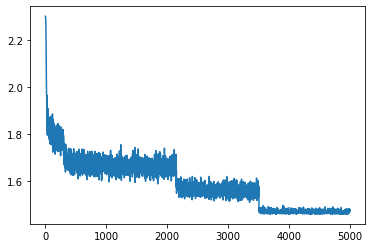

In [7]:
plt.plot([a.mean() for a in loss_log])
plt.show()